In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.use_jedi = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as sns; sns.set(font_scale=1.5)  # plot formatting

> Naive Bayes: extremely fast and simple classification

## Gaussian Naive Bayes

> Naive Bayes (NB) is **naive** because it makes the assumption that features of a measurement are independent of each other. This is naive because it is (almost) never true. 

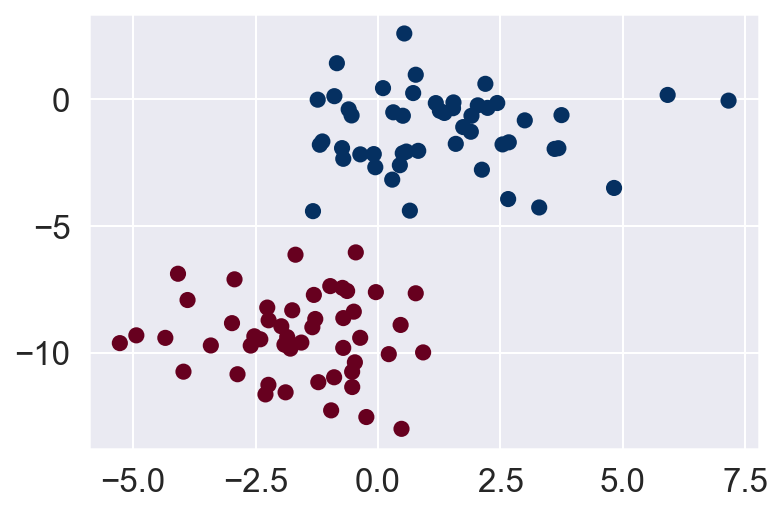

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

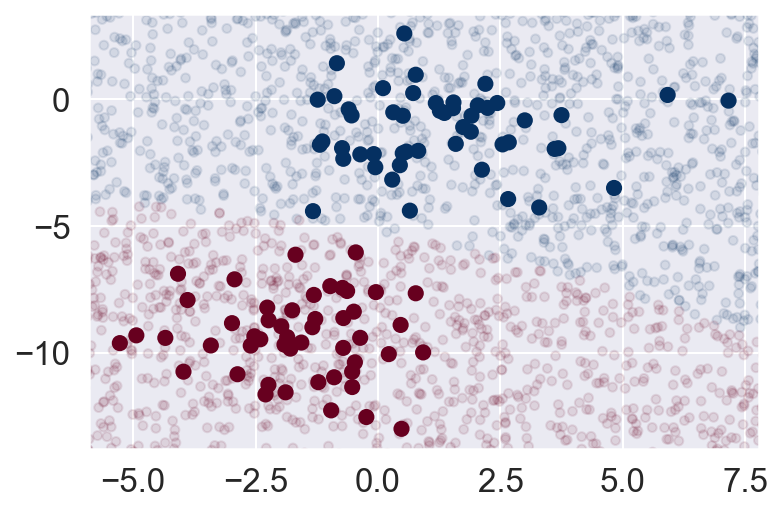

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

> We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.



In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [7]:
# Printing the source-code:
# GaussianNB?? 

::Does Gaussian Naive Bayes without priors just calculate mean and std for each class?::  
Yes. Source code for  `sklearn.naive_bayes.GaussianNB` just calculates the mean and standard deviation in a lazy and out-of-core way to be able to classify large data sets that do not fit into memory.




## Multinomial Naive Bayes

i.e. generalization of binomial distribution

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [10]:
len(train.data), len(test.data)

(2153, 1432)

In [33]:
np.array(train.target_names)[train.target[2:4]]

array(['sci.space', 'soc.religion.christian'], dtype='<U22')

In [12]:
fmt_str = '\n\n'+20*'%-'+'\n\n'
print(fmt_str.join(train.data[-10:-7]))
# train.data[3]: ???

From: db7n+@andrew.cmu.edu (D. Andrew Byler)
Subject: Re: Serbian genocide Work of God?
Organization: Freshman, Civil Engineering, Carnegie Mellon, Pittsburgh, PA
Lines: 61

Vera Shanti Noyes writes;

>this is what indicates to me that you may believe in predestination.
>am i correct?  i do not believe in predestination -- i believe we all
>choose whether or not we will accept God's gift of salvation to us.
>again, fundamental difference which can't really be resolved.

Of course I believe in Predestination.  It's a very biblical doctrine as
Romans 8.28-30 shows (among other passages).  Furthermore, the Church
has always taught predestination, from the very beginning.  But to say
that I believe in Predestination does not mean I do not believe in free
will.  Men freely choose the course of their life, which is also
affected by the grace of God.  However, unlike the Calvinists and
Jansenists, I hold that grace is resistable, otherwise you end up with
the idiocy of denying the universal s

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer




In [37]:
model = make_pipeline(TfidfVectorizer(),
                      MultinomialNB())

# Fitting the model
model.fit(train.data, train.target) 

# Testing how well it worked
labels = model.predict(test.data)






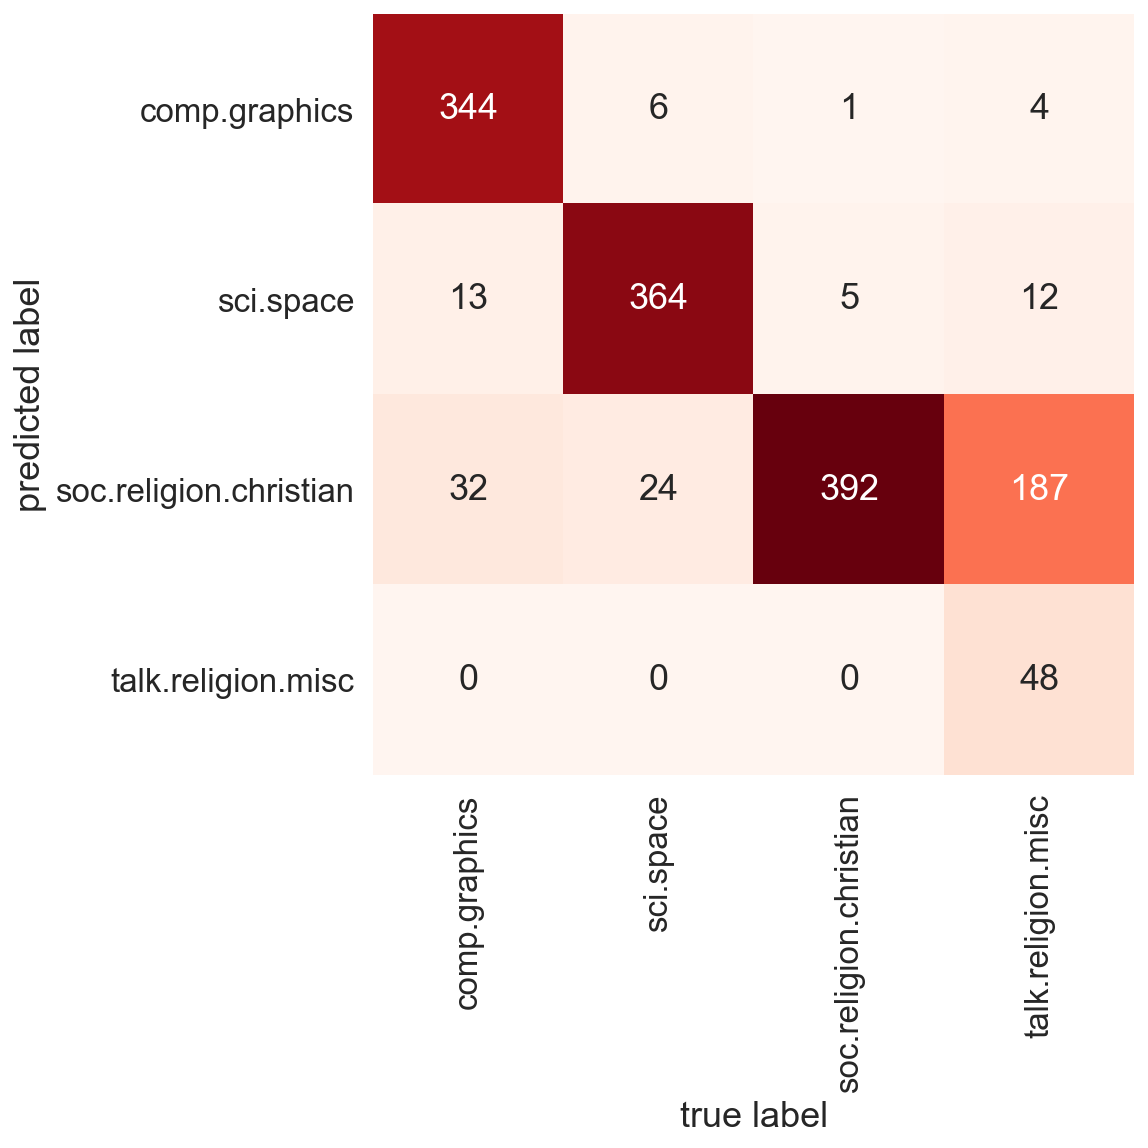

In [43]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Reds',
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [39]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [40]:
predict_category('I like turtles')

'sci.space'